In [ ]:
! pip install yahooquery
! pip install yfinance


Main Menu:
1. Select
2. Quit

Enter your choice: 1

Select Options:
1. Hong Kong
2. US
3. Cryptocurrency

Enter your choice: 2
Enter stock/crypto ticker: AAPL

Stock Options:
1. Check current price
2. CheckVolume
3. CheckMarket cap
4. Candle stick chart
5. History graph
6. Get news
7. Get History data
8. 50-day simple moving average (SMA) 
9. 100-day exponential moving average (EMA)
10. Export history data to CSV
11. Return to Menu
Enter your choice: 1
[*********************100%***********************]  1 of 1 completed
Current price: 173.1199951171875

Stock Options:
1. Check current price
2. CheckVolume
3. CheckMarket cap
4. Candle stick chart
5. History graph
6. Get news
7. Get History data
8. 50-day simple moving average (SMA) 
9. 100-day exponential moving average (EMA)
10. Export history data to CSV
11. Return to Menu
Enter your choice: 2
[*********************100%***********************]  1 of 1 completed
Volume: 53672700

Stock Options:
1. Check current price
2. CheckVolume
3.


Stock Options:
1. Check current price
2. CheckVolume
3. CheckMarket cap
4. Candle stick chart
5. History graph
6. Get news
7. Get History data
8. 50-day simple moving average (SMA) 
9. 100-day exponential moving average (EMA)
10. Export history data to CSV
11. Return to Menu
Enter your choice: 5
[*********************100%***********************]  1 of 1 completed


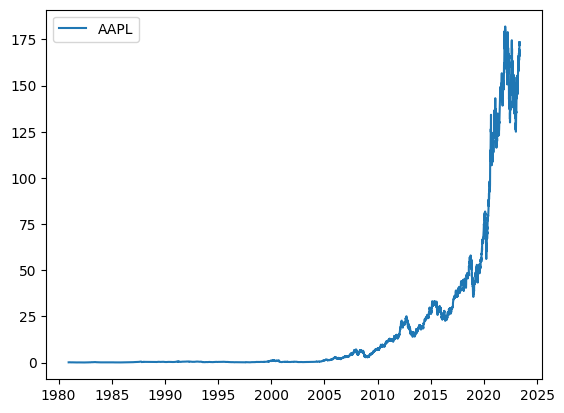


Stock Options:
1. Check current price
2. CheckVolume
3. CheckMarket cap
4. Candle stick chart
5. History graph
6. Get news
7. Get History data
8. 50-day simple moving average (SMA) 
9. 100-day exponential moving average (EMA)
10. Export history data to CSV
11. Return to Menu
Enter your choice: 6

News found in Yahoo Finance: AAPL:
---------------------------------
UPDATE 1-Italy's antitrust watchdog probes Apple over alleged app market abuse
https://finance.yahoo.com/news/1-italys-antitrust-watchdog-probes-074836327.html
Apple Supplier Hon Hai’s Profit Misses Despite iPhone Rebound
https://finance.yahoo.com/news/apple-supplier-hon-hai-profit-062209940.html
Taiwan’s Apple Suppliers See Sales Woes Continue in April
https://finance.yahoo.com/news/taiwan-apple-suppliers-see-sales-051512499.html
Apple Is Now the Only Major Phone Brand Without a Foldable
https://finance.yahoo.com/news/apple-now-only-major-phone-003008674.html
Google Launches Pixel Tablet With Special Features and Price to C


Stock Options:
1. Check current price
2. CheckVolume
3. CheckMarket cap
4. Candle stick chart
5. History graph
6. Get news
7. Get History data
8. 50-day simple moving average (SMA) 
9. 100-day exponential moving average (EMA)
10. Export history data to CSV
11. Return to Menu
Enter your choice: 8

50-day simple moving average (SMA) of 0005:
[*********************100%***********************]  1 of 1 completed
50-day SMA:  Date
2023-02-13       NaN
2023-02-14       NaN
2023-02-15       NaN
2023-02-16       NaN
2023-02-17       NaN
2023-02-20       NaN
2023-02-21       NaN
2023-02-22       NaN
2023-02-23       NaN
2023-02-24       NaN
2023-02-27       NaN
2023-02-28       NaN
2023-03-01       NaN
2023-03-02       NaN
2023-03-03       NaN
2023-03-06       NaN
2023-03-07       NaN
2023-03-08       NaN
2023-03-09       NaN
2023-03-10       NaN
2023-03-13       NaN
2023-03-14       NaN
2023-03-15       NaN
2023-03-16       NaN
2023-03-17       NaN
2023-03-20       NaN
2023-03-21       NaN
202


Stock Options:
1. Check current price
2. CheckVolume
3. CheckMarket cap
4. Candle stick chart
5. History graph
6. Get news
7. Get History data
8. 50-day simple moving average (SMA) 
9. 100-day exponential moving average (EMA)
10. Export history data to CSV
11. Return to Menu
Enter your choice: 6

News found in Yahoo Finance: BTC:
---------------------------------
Grayscale Investments® Forms Grayscale Funds Trust
https://finance.yahoo.com/news/grayscale-investments-forms-grayscale-funds-204000918.html
Grayscale® Solana Trust Now Trading on OTC Markets
https://finance.yahoo.com/news/grayscale-solana-trust-now-trading-123000028.html
Grayscale® Digital Large Cap Fund, Grayscale® DeFi Fund and Grayscale® Smart Contract Platform Ex-Ethereum Fund Announce Rebalancing of Funds for First Quarter 2023
https://finance.yahoo.com/news/grayscale-digital-large-cap-fund-123000361.html
Investors Flee Crypto Funds at Record Rate Despite Bitcoin’s Bullish Turn
https://finance.yahoo.com/m/872412e5-9564-

In [5]:
import yfinance as yf
import yahooquery as yq
import csv
import matplotlib.pyplot as plt
import plotly.graph_objs as go


class Stock:
    def __init__(self, ticker, exchange=""):
        self.ticker = ticker
        self.exchange = exchange
        
    def get_current_price(self):
        data = yf.download(self.ticker+self.exchange, period='1d', interval='1m')
        return data['Close'][0]

    def get_volume(self):
        data = yf.download(self.ticker+self.exchange, period='1d', interval='1d')
        return data['Volume'][0]

    def get_market_cap(self):
        company = yf.Ticker(self.ticker+self.exchange)
        return company.info.get("marketCap")

    def get_history_graph(self):
        data = yf.download(self.ticker+self.exchange, period='max', group_by="ticker")
        plt.plot(data.Close, label=self.ticker+self.exchange)
        plt.legend()
        plt.show()

    def get_history_data(self, period='max'):
        ticker = yf.Ticker(self.ticker)
        data = ticker.history(period=period)
        print(f"History data for {self.ticker}:")
        print(data)

    def get_news(self):
        stock = yf.Ticker(self.ticker)
        news = stock.news[:5]  # Get the latest 5 news articles
        for item in news:
            print(item['title'])
            print(item['link'])     

    def candle_stick(self):
        data = yf.download(self.ticker+self.exchange, period='1d', interval='5m')

        fig = go.Figure(data=[go.Candlestick(x=data.index,
                            open=data['Open'],
                            high=data['High'],
                            low=data['Low'],
                            close=data['Close'])])

        fig.show()

    def SMA(self):
        data = yf.download(self.ticker+self.exchange, period="3mo", interval="1d")

        sma = data["Close"].rolling(50).mean()

        # Print the 50-day SMA values to the console
        print("50-day SMA: ", sma)
    
    def EMA(self):
      data = yf.download(self.ticker+self.exchange, period="3mo", interval="1d")

      # Calculate the 100-day EMA for the stock using pandas
      ema = data["Close"].ewm(span=100, adjust=False).mean()

      # Print the 100-day EMA values to the console
      print("100-day EMA: ", ema)


    def export_csv(self):
        data = yf.download(self.ticker+self.exchange, period="max")
        filename = f"{self.ticker+self.exchange}_history_data.csv"
        with open(filename, 'w', newline='') as csvfile:
            fieldnames = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for date, row in data.iterrows():
                writer.writerow({'Date': date, 'Open': row['Open'], 'High': row['High'],
                                 'Low': row['Low'], 'Close': row['Close'], 'Volume': row['Volume']})
        print(f"\nData exported to {filename}")


def main_menu():
    print("\nMain Menu:")
    print("1. Select")
    print("2. Quit")

def select_options():
    print("\nSelect Options:")
    print("1. Hong Kong")
    print("2. US")
    print("3. Cryptocurrency")

def get_stock_ticker():
    ticker = input("\nEnter the stock ticker: ")
    return ticker

def main():
    while True:
        main_menu()
        choice = input("\nEnter your choice: ")

        if choice == '1':
            select_options()
            select_choice = input("\nEnter your choice: ")
            if select_choice == "1":
                exchange = ".HK"
            elif select_choice == "2":
                exchange = ""
            elif select_choice == "3":
                exchange = "-USD"
            else:
                print("Invalid choice")
                continue

            ticker = input("Enter stock/crypto ticker: ")
            query = ticker + exchange
            try:
                yf.Ticker(query).info
            except:
                print("Ticker not found")
                continue

            stock = Stock(ticker, exchange)

            while True:
                print("\nStock Options:")
                print("1. Check current price")
                print("2. CheckVolume")
                print("3. CheckMarket cap")
                print("4. Candle stick chart")
                print("5. History graph")
                print("6. Get news")
                print("7. Get History data")
                print("8. 50-day simple moving average (SMA) ")
                print("9. 100-day exponential moving average (EMA)")
                print("10. Export history data to CSV")
                print("11. Return to Menu")

                option_choice = input("Enter your choice: ")
                if option_choice == "1":
                    print("Current price:", stock.get_current_price())
                elif option_choice == "2":
                    print("Volume:", stock.get_volume())
                elif option_choice == "3":
                    print("Market Cap:", stock.get_market_cap())
                elif option_choice == "4":
                    stock.candle_stick()
                elif option_choice == "5":
                    stock.get_history_graph()
                elif option_choice == "6":
                    print(f"\nNews found in Yahoo Finance: {ticker}:")
                    print('---------------------------------')
                    stock.get_news()
                elif option_choice == "7":
                    print(f"\nThe history data in the past 5 years of {ticker}:")
                    stock.get_history_data()
                elif option_choice == "8":
                    print(f"\n50-day simple moving average (SMA) of {ticker}:")
                    stock.SMA()
                elif option_choice == "9":
                    print(f"\nThe 100-day exponential moving average (EMA) of {ticker}:")
                    stock.EMA()
                elif option_choice == "10":
                    print("Exported to CSV file!")
                    stock.export_csv()
                elif option_choice == "11":
                    break
                else:
                    print("Invalid choice, please type again!")

        elif choice == '2':
            print("\nThank you for using this program. See you later!")
            break

        else:
            print("\nInvalid choice. Please try again!")

if __name__ == "__main__":
    main()